<a href="https://colab.research.google.com/drive/19DiGJtrwBtEFIcmAkhpV0dQa-kX4s4iM?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EE8603 – Red Wine Quality Multiclass Classification Task using Pycaret


---



Zaki Hadaya – 501147430

---
### Scope:

This project employs PyCaret for classifying red wine quality, using a dataset from the UCI Machine Learning Repository. Challenges include handling data imbalances and optimizing attribute categorization. Leveraging Pandas, and Numpy, the objective goes beyond predicting quality, aiming to uncover the intrinsic factors shaping red wine excellence, blending traditional viticultural wisdom with modern machine learning methods.



## Pycaret and Required Libraries Installation

In [ ]:
!pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.0 MB/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Improrting Data

Note: We added ";" to view the dataset as a table, otherwise it will be displayed as text.

In [ ]:
# getting the dataset and unzipping
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip
df_wine = pd.read_csv('/content/winequality-red.csv',sep=';')

replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace winequality-white.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace winequality.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
# displaying the dataset and highlighting the target column
def highlight_last_column(s):
    return ['background-color: lightcoral' if i == len(s) - 1 else '' for i in range(len(s))]

styled_df = df_wine.style.apply(lambda x: highlight_last_column(x), axis=1)

styled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


### Coverting the target column to categorical as it's a classification task

In [ ]:
df_wine['quality'] = df_wine['quality'].astype('category')
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


# EDA Visualization

In [ ]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

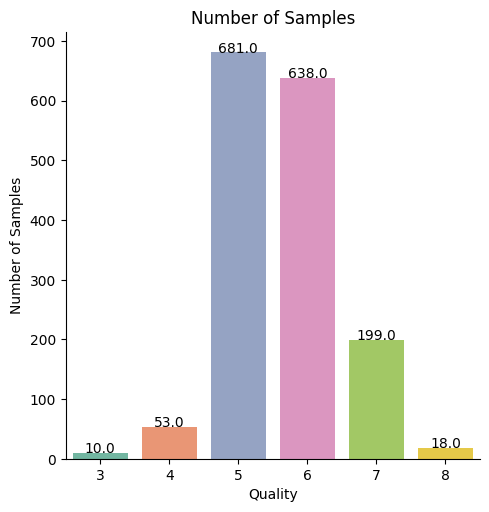

In [ ]:
catplot = sns.catplot(x='quality', data=df_wine, kind='count', palette=custom_palette)

ax = catplot.ax
for s in ax.patches:
    ax.annotate(f'{s.get_height()}', (s.get_x() + s.get_width() / 2., s.get_height()), ha='center', va='baseline')

plt.title("Number of Samples")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")

plt.show()


This script generates a heatmap visualization to explore the correlation between different numerical attributes in a DataFrame `(df_wine)`. It computes the correlation matrix using the Pandas `corr()` function, sets a custom color map `("coolwarm")` using Seaborn, and then creates a square heatmap with numerical annotations. The figure is displayed with a color bar indicating the correlation values, providing a visual representation of the relationships between the variables in the dataset. The color intensity and annotations help interpret the strength and direction of correlations, aiding in data analysis and pattern recognition.

<ipython-input-8-33ad3f4cfe2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_wine.corr()


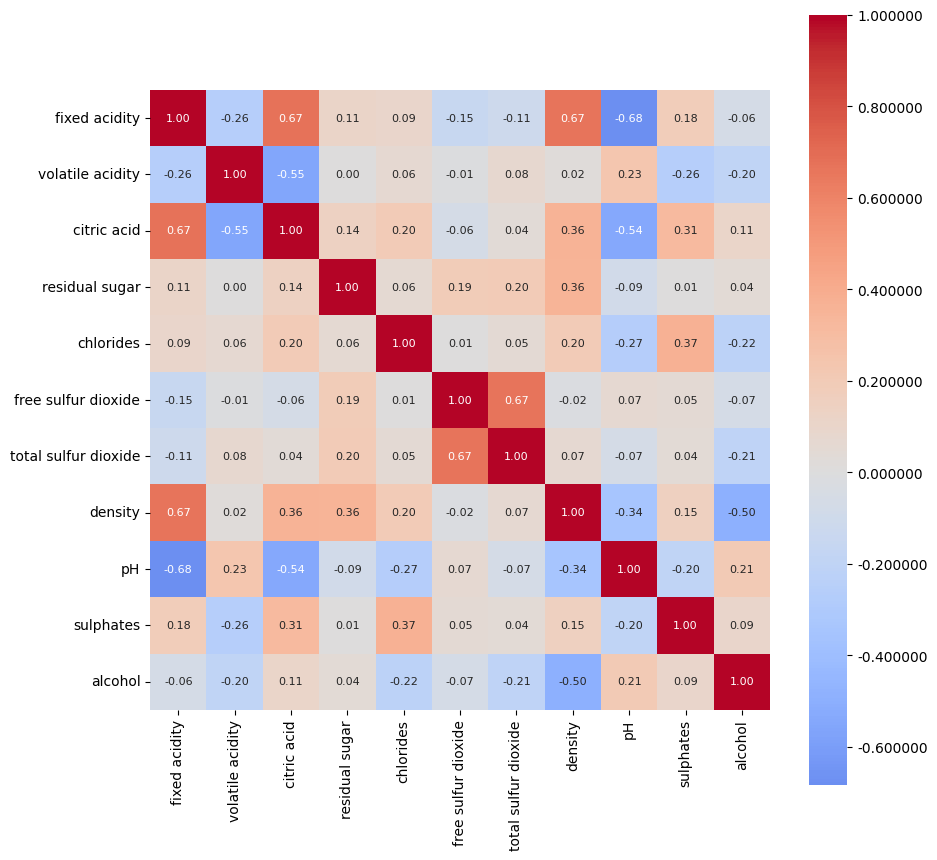

In [ ]:
correlation = df_wine.corr()
custom_cmap = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap=custom_cmap, center=0, cbar_kws={'format': '%1f'})

plt.show()

In the heatmap, colors convey information about the relationship between variables:

* Red indicates a positive correlation, where both variables increase together (e.g., Alcohol and Quality).

* Grey suggests no significant correlation (values around 0.00), as seen in pairs like pH and Free Sulfur Dioxide.

* Blue signifies a negative correlation, where one variable increases while the other decreases (e.g., Alcohol and Density).

# Pycaret Classification Expirement Setup

In [ ]:
from pycaret.classification import *

### Setting up the session

In [ ]:
s=setup(data=df_wine, target='quality', train_size=0.7, numeric_features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], categorical_features=[], session_id=42, experiment_name='wine_quality_classification')

,Description,Value
0,Session id,42
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


### Comparing models

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6916,0.6047,0.6916,0.6654,0.6715,0.4973,0.5027,0.4790
rf,Random Forest Classifier,0.6783,0.5899,0.6783,0.6476,0.6582,0.4768,0.4812,0.6070
catboost,CatBoost Classifier,0.6720,0.5853,0.6720,0.6439,0.6536,0.4693,0.4736,9.5860
lightgbm,Light Gradient Boosting Machine,0.6640,0.5841,0.6640,0.6367,0.6473,0.4580,0.4611,1.9540
xgboost,Extreme Gradient Boosting,0.6551,0.5820,0.6551,0.6317,0.6406,0.4471,0.4495,0.3330
gbc,Gradient Boosting Classifier,0.6461,0.5611,0.6461,0.6274,0.6298,0.4306,0.4344,1.8800
dt,Decision Tree Classifier,0.6086,0.5018,0.6086,0.6071,0.6058,0.3902,0.3914,0.0700
lr,Logistic Regression,0.5943,0.5288,0.5943,0.5579,0.5612,0.3235,0.3296,1.0910
lda,Linear Discriminant Analysis,0.5862,0.5334,0.5862,0.5637,0.5704,0.3334,0.3355,0.0710
ridge,Ridge Classifier,0.5782,0.0000,0.5782,0.4765,0.5216,0.2817,0.2928,0.0640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

The Extra Trees Classifier is often considered an effective model due to its ability to reduce overfitting by employing a randomization strategy in the tree-building process, introducing additional variability. This randomness, achieved through both feature and bootstrap sampling, enhances the model's robustness, making it resilient to noise and diverse datasets, ultimately leading to improved generalization performance. However, we will be using another two models so we can compare.

### Creating Extra Trees Classifier Model

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7232,0.8969,0.7232,0.6964,0.7037,0.5479,0.5541
1,0.7857,0.9160,0.7857,0.7545,0.7683,0.6534,0.6558
2,0.6161,0.8272,0.6161,0.5856,0.5984,0.3848,0.3874
3,0.7232,0.8611,0.7232,0.6882,0.7027,0.5512,0.5549
4,0.7054,0.8544,0.7054,0.6680,0.6755,0.5140,0.5222
5,0.6607,0.8438,0.6607,0.6602,0.6462,0.4486,0.4574
6,0.7232,0.0000,0.7232,0.6893,0.6980,0.5463,0.5528
7,0.6964,0.0000,0.6964,0.6610,0.6749,0.5062,0.5101
8,0.6518,0.0000,0.6518,0.6418,0.6340,0.4260,0.4315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Creating Random Forest Model

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6964,0.8772,0.6964,0.6606,0.6756,0.5078,0.5116
1,0.7411,0.8786,0.7411,0.7130,0.7211,0.5745,0.5793
2,0.6071,0.8006,0.6071,0.5722,0.5881,0.3672,0.3691
3,0.6696,0.8286,0.6696,0.6400,0.6511,0.4653,0.4685
4,0.6786,0.8447,0.6786,0.6459,0.6537,0.4721,0.4783
5,0.6339,0.8180,0.6339,0.6166,0.6184,0.4065,0.4123
6,0.7500,0.0000,0.7500,0.7111,0.7276,0.5951,0.5991
7,0.6964,0.0000,0.6964,0.6626,0.6737,0.5033,0.5079
8,0.6429,0.0000,0.6429,0.6058,0.6206,0.4176,0.4211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Also selecting SVM as it has worse results

In [ ]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4107,0.0000,0.4107,0.2347,0.2567,0.0494,0.1112
1,0.5357,0.0000,0.5357,0.5225,0.4468,0.2122,0.2901
2,0.5089,0.0000,0.5089,0.4862,0.4441,0.1712,0.2184
3,0.4732,0.0000,0.4732,0.3976,0.3695,0.0963,0.1412
4,0.4821,0.0000,0.4821,0.4602,0.4146,0.1292,0.1703
5,0.4196,0.0000,0.4196,0.4784,0.2805,0.0288,0.0817
6,0.4643,0.0000,0.4643,0.3903,0.3897,0.1011,0.1212
7,0.3929,0.0000,0.3929,0.1543,0.2216,0.0000,0.0000
8,0.5000,0.0000,0.5000,0.4098,0.4365,0.1561,0.1713


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning Chosen Models

The tune_model function in PyCaret fine-tunes the hyperparameters of a pre-trained machine learning model using grid search or random search, optimizing its performance based on a specified evaluation metric.

In [ ]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6786,0.8322,0.6786,0.6813,0.6344,0.4539,0.4674
1,0.6518,0.8158,0.6518,0.5371,0.5877,0.4029,0.4191
2,0.6071,0.7751,0.6071,0.6148,0.5712,0.3341,0.3425
3,0.5804,0.7744,0.5804,0.5968,0.5324,0.2897,0.3007
4,0.5982,0.7409,0.5982,0.6112,0.5603,0.3240,0.3333
5,0.5268,0.7433,0.5268,0.5553,0.4969,0.2045,0.2108
6,0.6339,0.0000,0.6339,0.5299,0.5748,0.3805,0.3975
7,0.5714,0.0000,0.5714,0.4679,0.5144,0.2711,0.2815
8,0.5804,0.0000,0.5804,0.4804,0.5252,0.2883,0.2994


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


The et model achieved an average accuracy of 60.59% across ten folds in cross-validation, with a mean AUC of 0.5498. While demonstrating moderate overall performance, variations in individual fold metrics indicate potential sensitivity to specific subsets of the data.

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7232,0.8582,0.7232,0.6825,0.6955,0.5420,0.5480
1,0.6964,0.8455,0.6964,0.6547,0.6585,0.4908,0.5024
2,0.5893,0.7815,0.5893,0.5597,0.5726,0.3320,0.3342
3,0.6518,0.8176,0.6518,0.6197,0.6230,0.4244,0.4314
4,0.6518,0.7905,0.6518,0.6302,0.6255,0.4233,0.4308
5,0.5893,0.7726,0.5893,0.5650,0.5674,0.3245,0.3306
6,0.6786,0.0000,0.6786,0.6514,0.6536,0.4716,0.4796
7,0.6339,0.0000,0.6339,0.5907,0.6024,0.3942,0.4003
8,0.5893,0.0000,0.5893,0.6016,0.5670,0.3156,0.3231


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


The rf learning model exhibited an average accuracy of 64.52% across ten folds in cross-validation, with a mean AUC of 0.5696. While the model demonstrated reasonable overall performance, individual fold metrics varied, suggesting potential sensitivity to specific subsets of the data.

In [ ]:
tuned_svm = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.0000,0.6250,0.5614,0.5838,0.3694,0.3766
1,0.6250,0.0000,0.6250,0.5777,0.5985,0.3895,0.3924
2,0.5536,0.0000,0.5536,0.4865,0.5133,0.2495,0.2588
3,0.6607,0.0000,0.6607,0.6347,0.6415,0.4498,0.4533
4,0.5625,0.0000,0.5625,0.5406,0.5396,0.2762,0.2804
5,0.5179,0.0000,0.5179,0.4718,0.4809,0.1922,0.1969
6,0.5893,0.0000,0.5893,0.5561,0.5722,0.3422,0.3432
7,0.5357,0.0000,0.5357,0.5176,0.5229,0.2493,0.2508
8,0.5179,0.0000,0.5179,0.4535,0.4821,0.2030,0.2079


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits



The model demonstrated an average accuracy of 57.55% across ten folds in cross-validation, with a mean AUC of 0. The absence of AUC values suggests potential issues, indicating that the model might face challenges in distinguishing between classes. The standard deviations in various metrics underscore some variability in performance across different folds.







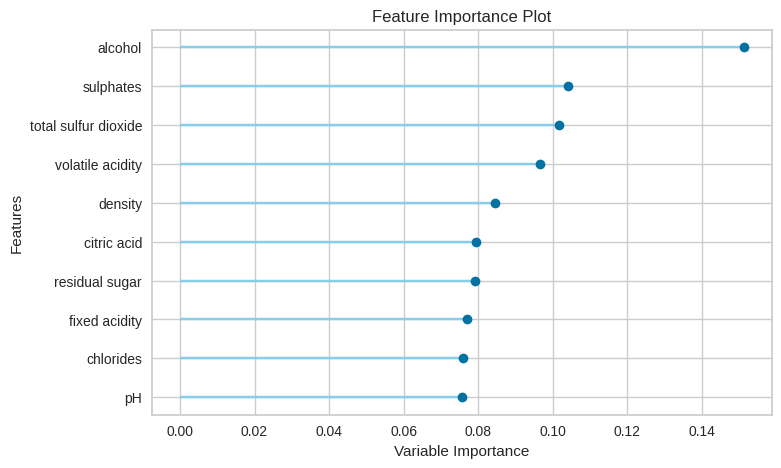

In [ ]:
plot_model(tuned_et, plot = 'feature')

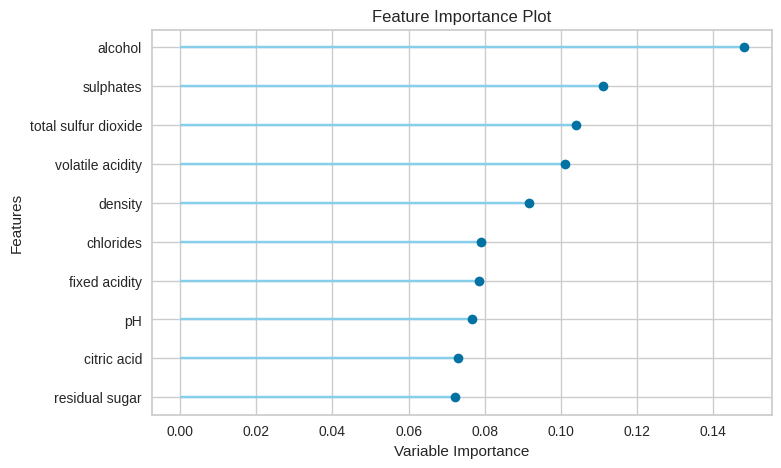

In [ ]:
plot_model(tuned_rf, plot = 'feature')

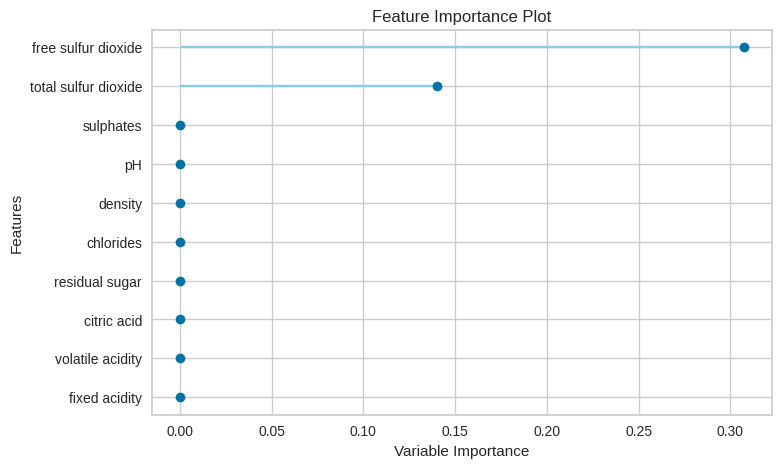

In [ ]:
plot_model(tuned_svm, plot = 'feature')

We notice from the above that after tuning SVM most of the features have lost their coorelation with the target.

In addition, ET and RF have given similar results. Therefore, I have decided to carry on with **Extra Tree Classifier**.

### Plotting **Decision Boundaries**

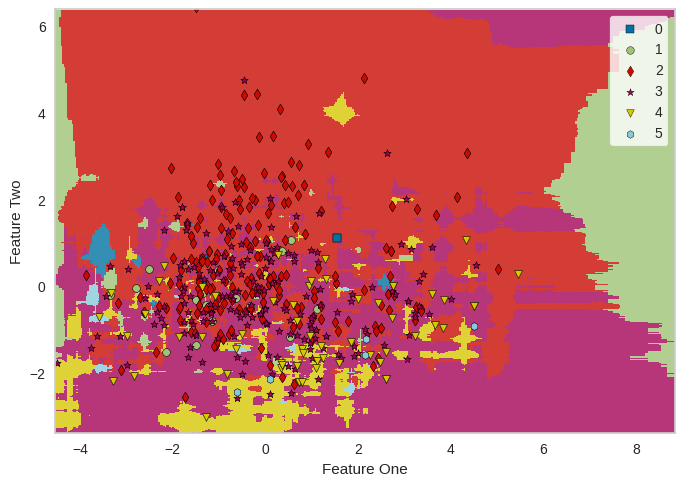

In [ ]:
plot_model(tuned_et, plot = 'boundary')

As we noticed from the above there are imbalanced classes

### Fixing the imbalanced classes via oversampling


This script employs the `imblearn` library's `ADASYN` algorithm, specifically configured to oversample the minority class in an imbalanced dataset. By generating synthetic examples for the minority class, ADASYN aims to address class imbalance, enhancing the robustness of machine learning models trained on such datasets.

In [ ]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')

 This code applies various preprocessing techniques, including data normalization using z-score, feature transformation using quantile transformation, and addressing class imbalance with the ADASYN algorithm. The session is configured with a specific session ID, experiment name, and additional parameters for reproducibility and customization.

In [ ]:
s2 = setup(df_wine, target = 'quality', session_id=177, log_experiment=False,
                  experiment_name='wine_q2', normalize=True, normalize_method='zscore',
                  transformation=True, transformation_method = 'quantile', fix_imbalance=True,
                  fix_imbalance_method= adasyn1)

,Description,Value
0,Session id,177
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(2068, 12)"
6,Transformed train set shape,"(1588, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
best2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6578,0.5684,0.6578,0.6427,0.6463,0.4534,0.4560,0.9700
lightgbm,Light Gradient Boosting Machine,0.6542,0.5658,0.6542,0.6274,0.6371,0.4416,0.4449,3.1730
rf,Random Forest Classifier,0.6524,0.5725,0.6524,0.6292,0.6339,0.4350,0.4396,0.9270
catboost,CatBoost Classifier,0.6506,0.5696,0.6506,0.6365,0.6381,0.4398,0.4433,20.1290
et,Extra Trees Classifier,0.6470,0.5779,0.6470,0.6256,0.6284,0.4255,0.4303,0.4750
gbc,Gradient Boosting Classifier,0.6328,0.5451,0.6328,0.6203,0.6218,0.4141,0.4177,3.0800
qda,Quadratic Discriminant Analysis,0.5666,0.5065,0.5666,0.5557,0.5585,0.3219,0.3236,0.2120
dt,Decision Tree Classifier,0.5658,0.4653,0.5658,0.5716,0.5660,0.3262,0.3278,0.1120
lr,Logistic Regression,0.5622,0.5182,0.5622,0.5748,0.5597,0.3159,0.3209,1.1210
lda,Linear Discriminant Analysis,0.5559,0.5210,0.5559,0.5776,0.5619,0.3241,0.3277,0.1070


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

From above we noticed the following:


*   After attempting to fix the imbalance, comparing the model time has increarsed significantly
*   The results also have decreased, and Extra Trees Classifier is no longer the best

Since we are trying to compare before and after oversamling, we will continue using `ET`



In [ ]:
et_2 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.8204,0.6250,0.6031,0.6113,0.4043,0.4074
1,0.7143,0.8559,0.7143,0.6964,0.7012,0.5435,0.5471
2,0.6429,0.8382,0.6429,0.6225,0.6310,0.4254,0.4267
3,0.6161,0.7985,0.6161,0.6187,0.6014,0.3741,0.3812
4,0.5893,0.7892,0.5893,0.5366,0.5514,0.3206,0.3295
5,0.6339,0.8174,0.6339,0.6071,0.6135,0.4047,0.4090
6,0.6518,0.0000,0.6518,0.6347,0.6340,0.4370,0.4463
7,0.6518,0.0000,0.6518,0.6193,0.6321,0.4308,0.4343
8,0.6161,0.0000,0.6161,0.6122,0.6056,0.3722,0.3760


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et2 = tune_model(et_2)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5179,0.7524,0.5179,0.5672,0.5298,0.3033,0.3105
1,0.5714,0.7835,0.5714,0.6089,0.5791,0.3697,0.3760
2,0.5714,0.7904,0.5714,0.6381,0.5846,0.3782,0.3899
3,0.5179,0.7407,0.5179,0.5377,0.5179,0.2907,0.2951
4,0.5446,0.7580,0.5446,0.5418,0.5278,0.3032,0.3122
5,0.5536,0.7442,0.5536,0.5631,0.5533,0.3201,0.3231
6,0.5536,0.0000,0.5536,0.5802,0.5575,0.3377,0.3444
7,0.5446,0.0000,0.5446,0.5637,0.5417,0.3162,0.3231
8,0.6250,0.0000,0.6250,0.6604,0.6191,0.4398,0.4536


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


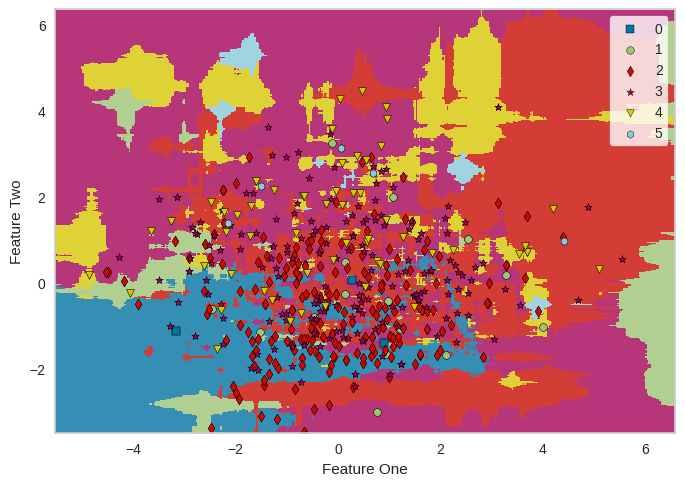

In [ ]:
plot_model(tuned_et2, plot = 'boundary')

Clearly, oversampling has fixed the imbalance and the data distribution has improved.

### Let's get more data from this model

This code evaluates the performance of a tuned Extra Trees classifier (`tuned_et2`) in PyCaret, generating a detailed report containing key metrics to assess the model's effectiveness on the validation set. The report includes metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.








In [ ]:
evaluate_model(tuned_et2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

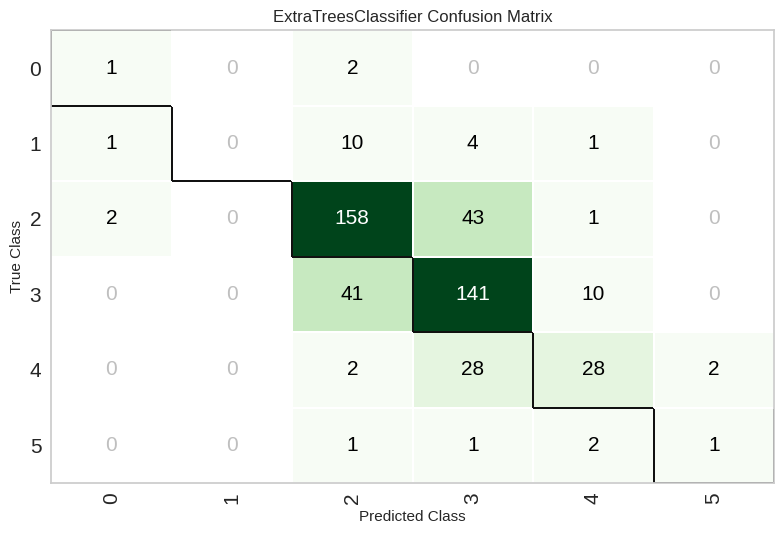

In [ ]:
plot_model(tuned_et2, plot = 'confusion_matrix')

These insights help evaluate the model's performance in distinguishing between different quality levels of wine and identifying potential areas for improvement or fine-tuning.

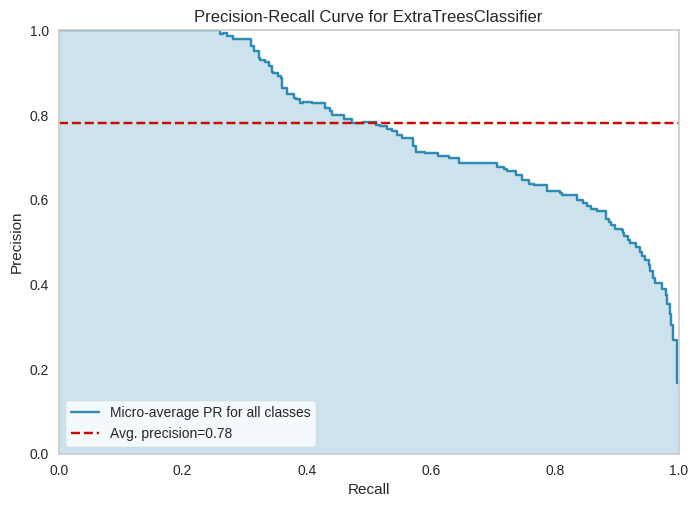

In [ ]:
plot_model(tuned_et2, plot = 'pr')


The declining Precision-Recall curve with a threshold of 0.8 indicates that, at a higher confidence level, the model prioritizes precision over recall. This suggests a more conservative approach in making positive predictions, emphasizing accuracy but potentially missing some positive instances. Adjusting the threshold allows for a trade-off between precision and recall based on specific application requirements.

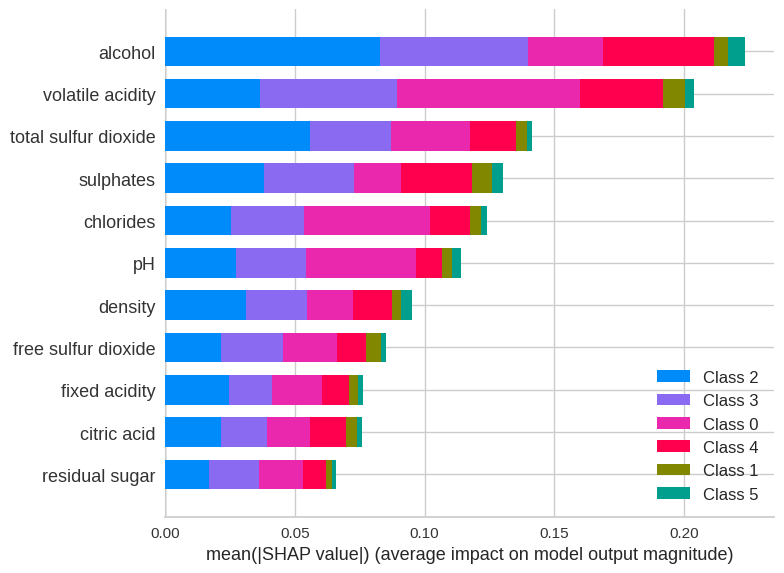

In [ ]:
interpret_model(tuned_et2)


The `predict_model` function in PyCaret is utilized to generate predictions on new data using the chosen Extra Trees classifier (et). This function is applied to the holdout dataset (holdout_pred), which serves as our test set.

In [ ]:
predmod = predict_model(tuned_et2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6854,0.8612,0.6854,0.6621,0.6701,0.4915,0.4942


In [ ]:
predmod.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5,5,0.62
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6,0.58
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,3,0.79
887,10.7,0.52,0.38,2.6,0.066,29.0,56.0,0.99577,3.15,0.79,12.1,7,6,0.63
640,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5,5,1.00


The presented information indicates the model's successful predictions of the quality class for each sample, including the actual quality and a prediction score. It's worth noting that there are instances of incorrect predictions. Now, let's duplicate the `df_wine` data frame and remove the quality column from the copy.

In [ ]:
new_df = df_wine.copy()
new_df.drop('quality', axis=1, inplace=True)
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
predict = predict_model(tuned_et2, data = new_df)
predict.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.00
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.00
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.58
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.00
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.00


The model has successfully predicted!

## Save Model

In [ ]:
save_model(tuned_et2, 'redwine_quality_classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

## Reloading the Model for Verification

In [ ]:
load_model('redwine_quality_classification_model')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=177,
                                      verbose=0, warm_start=False))],
         verbose=False)

### Model Deployment (Steps Only for AWS)



1.   [AWS Account Setup](https://aws.amazon.com/)
2.   [Installing AWS Command Line Interface](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html)
3. Configure AWS CLI: access key, secret key, etc.
4. [Install Docker](https://https://docs.docker.com/get-docker/)
5. Dockerize Flask Application
6. Build and Push Docker Image to Amazon ECR (Elastic Container Registry):


```
1. Create an Amazon ECR repository:
aws ecr create-repository --repository-name wine-quality-app

2.Build Docker image:
docker build -t wine-quality-app .

3.Tag the image:
docker tag wine-quality-app:latest <account-id>.dkr.ecr.<region>.amazonaws.com/wine-quality-app:latest

4.Authenticate Docker to your ECR registry:
aws ecr get-login-password --region <region> | docker login --username AWS --password-stdin <account-id>.dkr.ecr.<region>.amazonaws.com

5.Push the Docker image to ECR:
docker push <account-id>.dkr.ecr.<region>.amazonaws.com/wine-quality-app:latest


```
7.Deploy on AWS Elastic Beanstalk:
* Navigate to the AWS Management Console and go to the Elastic Beanstalk service.
* Click "Create Application."
* Provide a name for your application and click "Create."
*Click "Create a new environment" and choose "Web server environment."
*In the "Base configuration" section:
Choose the platform (Docker). >
Upload your Docker image from ECR.
*In the "Additional Resources" section, choose an instance type suitable for your application.
*Click "Create environment."
*Wait for the environment to be created. It may take a few minutes.

8.Access Your Deployed Application

# Conclusion:

In summary, this machine learning project focused on red wine quality classification, involving a comprehensive exploration of the dataset through various data analysis and visualization techniques. The initial red wine dataset was sourced from a public repository, thoroughly examined to understand its structure and characteristics.

The dataset, containing features of red wine, underwent preprocessing to address any missing values, and a summary was provided, including statistical measures such as mean and standard deviation. Exploratory data analysis included visualizations like a categorical plot displaying the distribution of wine qualities and bar plots illustrating the relationship between selected features and wine quality. Additionally, a correlation matrix and heatmap were generated to understand feature relationships and correlations with the target variable, 'quality.' Notably, "Alcohol" showed the highest correlation with quality.

In conclusion, this project illustrates a systematic approach to red wine quality classification, integrating exploratory data analysis with advanced machine learning techniques, laying the groundwork for further refinement and practical deployment.